In [1]:
import os

base_dir = 'C:/Users/s_csmscox/jupyterSave/eyes'

file_list = os.listdir(base_dir)

file_list

['s0001',
 's0002',
 's0003',
 's0004',
 's0005',
 's0006',
 's0007',
 's0008',
 's0009',
 's0010',
 's0011',
 's0012',
 's0013',
 's0014',
 's0015',
 's0016',
 's0017',
 's0018',
 's0019',
 's0020',
 's0021',
 's0022',
 's0023',
 's0024',
 's0025',
 's0026',
 's0027',
 's0028',
 's0029',
 's0030',
 's0031',
 's0032',
 's0033',
 's0034',
 's0035',
 's0036',
 's0037']

In [2]:
open_eye = []
close_eye = []

for file in file_list:
    path_dir = base_dir + '/' + file
    
    img_list = os.listdir(path_dir)
    
    for image in img_list:
        if image[16] == '0':
            open_eye.append(file+ '/' +image)
        else:
            close_eye.append(file+ '/' +image)

In [3]:
close_eye[1000]

's0001/s0001_02842_0_1_1_2_0_01.png'

In [4]:
import pandas as pd

open_df = pd.DataFrame(open_eye, columns=['img'])
close_df = pd.DataFrame(close_eye, columns=['img'])

In [7]:
import shutil
from sklearn.model_selection import train_test_split

base_dst = 'C:/Users/s_csmscox/jupyterSave/eye_blink/'

# open_eye 나누기
train, test = train_test_split(open_df, test_size=0.2, random_state=42)
train, valid = train_test_split(train, test_size=0.2, random_state=42)

for image in train['img']:
    src = base_dir+ '/' + image
    dst = base_dst + '/train/0'
    shutil.move(src, dst)
    
for image in valid['img']:
    src = base_dir+ '/' + image
    dst = base_dst + '/valid/0'
    shutil.move(src, dst)
    
for image in test['img']:
    src = base_dir+ '/' + image
    dst = base_dst + '/test/0'
    shutil.move(src, dst)

# close_eye 나누기
train, test = train_test_split(close_df, test_size=0.2, random_state=42)
train, valid = train_test_split(train, test_size=0.2, random_state=42)

for image in train['img']:
    src = base_dir+ '/' + image
    dst = base_dst + '/train/1'
    shutil.move(src, dst)
    
for image in valid['img']:
    src = base_dir+ '/' + image
    dst = base_dst + '/valid/1'
    shutil.move(src, dst)
    
for image in test['img']:
    src = base_dir+ '/' + image
    dst = base_dst + '/test/1'
    shutil.move(src, dst)
    
    

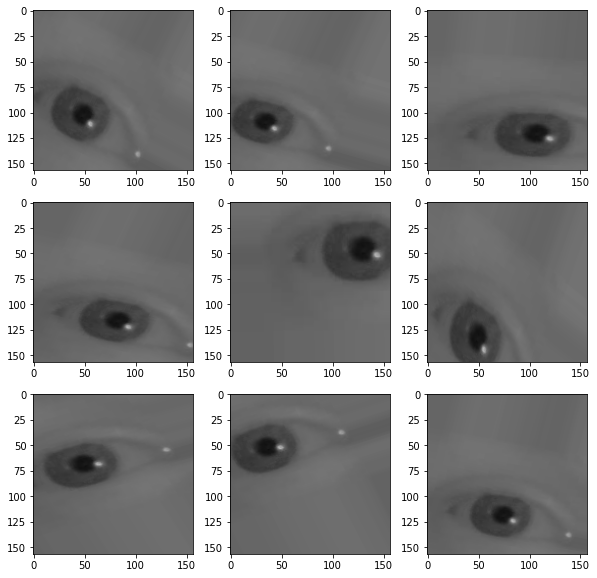

In [4]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt

img = load_img('C:/Users/dltmd/Downloads/eye.png')

data = img_to_array(img)

samples = expand_dims(data, 0)

train_datagen = ImageDataGenerator(rotation_range=30,  # 지정된 각도 범위내에서 임의로 원본 이미지를 회전
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   zoom_range=0.3,    #  1-수치 혹은 1+수치만큼 확대 및 축소
                                   )

train_generator = train_datagen.flow(samples, batch_size=1)

fig = plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    
    batch = train_generator.next()
    
    image = batch[0].astype('uint8')
    
    plt.imshow(image)
    
plt.show()